# Import necessary libraries and the 5 dataframes for the 5 reviews

In [123]:
import pandas as pd
import nltk
from nltk import TreebankWordTokenizer
import spacy
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('1_Rating.csv')
df2 = pd.read_csv('2_Rating.csv')
df3 = pd.read_csv('3_Rating.csv')
df4 = pd.read_csv('4_Rating.csv')
df5 = pd.read_csv('5_Rating.csv')

In [3]:
df1.drop(columns=['Unnamed: 0'], inplace = True)
df2.drop(columns=['Unnamed: 0'], inplace = True)
df3.drop(columns=['Unnamed: 0'], inplace = True)
df4.drop(columns=['Unnamed: 0'], inplace = True)
df5.drop(columns=['Unnamed: 0'], inplace = True)

In [4]:
pd.options.display.max_colwidth = 5000
df1.head()

,Cool,Funny,Rating,Text,Useful,Sentiment
0,1,1,1.0,"Atrocious. The live music was loud and mediocre, the decor plain and dull, the food, amateurish and overly expensive for its quality, with too many heavy, goopy sauces and dressings. Pitchers of sangria were weak and full of ice, and, to top it off, the bathrooms were filthy, like a low-end club at 3am. Inexcuseable.",2,-0.3182
1,1,4,1.0,"Well, I've been staying here for the last four weeks, so I've gotten pretty used to this place. The lobby is nice, but the rooms are average. No microwaves. And sometimes there's a refrigerator, but it's hidden. I didn't know I had one in my room until I was about to leave one week and noticed a humming noise inside the tv cabinet, and the tv was off. The housekeeping staff tries to get on your good side by giving you little chocolates each night. The wireless connection is good everywhere but the top floor, where it comes in only in some rooms, and then it goes off and on intermittently. There's also a continental breakfast FOR THE TOP FLOOR ONLY. I don't get it at all. They don't tell you about it unless you're on the ""executive level."" Like it's such a big deal! It's the same cereal, coffee and crappy pasteries you'll find anywhere, except worse. What a load of bullshit. TV stations are limited and seem to vary by the room (No Comedy Central sometimes). Some bathrooms have a tub, others have a big glass shower with a powerful showerhead. But the Crowne Plaza wins for its beds, as usual. You get tons of pillows. The service is good too. They were very accomodating when I wanted to change rooms because (nerd) my room didn't get the wi-fi connection. But, you know, I stayed here on the government dime at their rate of $226. But I think regularly priced rooms are around $350. I wouldn't spend what they charge just for a night here. $13 just to park. Idiots. In short, I would not reccomend staying in any hotels in New York City ever. As such, sorry, CP. You get one star. I can't reccomend any hotel that charges the rates of a NYC hotel, even in NYC.\r Oh, and there's also big a big inflated rat out front of the hotel with a sign that says ""This hotel mistreates workers."" Just in case you wanted to know.",2,0.9487
2,4,6,1.0,"I'm sorry Food Network - for some reason one of your star chef's latest restaurant has some problems in the kitchen. Let's see, start out with a corked bottle of wine (ok could be forgivable), then a starter comes out completely cold (and meant to be hot), a dish that never arrives, French Fries with entree (again hot item that arrives COLD), and a lot of rushing the diners to ""order everything upfront so that it arrives in the right stages"" - gee - I thought that was their responsibility to manage, not ours! The menu didn't make a lot of sense, and the flavors were muddied with overly sweet, overly hot (spicy) ingredients that never balanced and basically failed.Totally unimpressive and I'm sure the tourists will love it.",7,0.6588
3,5,8,1.0,"Britney is one of the few stars that has ever existed that can command an entire arena, that emits spiritual and psychic positive energy through her voice and performance that has the power to change how an audience feels. I have seen this countless times, at nightclubs: boring after boring song comes on, but when the DJ plays Britney suddenly the room erupts. Very few performers had the ability to do this, in history. Michael Jackson, Elvis Presley, Judy Garland... the names on this list are surprisingly few. However, Britney Spears is one of them. She has the power to illuminate a room, and the World, with her work. I am not quite sure she realizes this, she is probably far too humble, which is an integral part of her mysterious Greatness... but I digress.\n\nI did not feel the staff at the Axis theater were worthy of her. They were rude, rushed me into my seat and out of the theater just as soon as they could, and I barely had time to buy a tee- shirt. I snuck next to the gla

# Need to separate my text from my dataframe to begin the tokenization process

In [5]:
one_star_reviews = df1['Text'].tolist()

In [6]:
# How many reviews I have with a 1 star rating
len(one_star_reviews)

4793

In [7]:
# Checking to see if each review is broken out
one_star_reviews[0]

'Atrocious. The live music was loud and mediocre, the decor plain and dull, the food, amateurish and overly expensive for its quality, with too many heavy, goopy sauces and dressings. Pitchers of sangria were weak and full of ice, and, to top it off, the bathrooms were filthy, like a low-end club at 3am. Inexcuseable.'

# Need to break out each word from each sentence from each review (tokenization)

In [36]:
# Using spacy to lemmatize the words for which we only need the tagger component.
nlp = spacy.load('en', disable=['parser', 'ner'])

doc = nlp(one_star_reviews[0])
" ".join([token.lemma_ for token in doc])

'atrocious . the live music be loud and mediocre , the decor plain and dull , the food , amateurish and overly expensive for -PRON- quality , with too many heavy , goopy sauce and dressing . pitcher of sangria be weak and full of ice , and , to top -PRON- off , the bathroom be filthy , like a low - end club at 3 a.m. . inexcuseable .'

In [60]:
tokenizer = TreebankWordTokenizer()
# A lot of the words in the reviews will be stop words, so getting rid of them to get a clearer idea of the 
# words each star rating uses the most
stopwords_list = stopwords.words('english') + list(string.punctuation)
# As we saw above, the spacy lemmatizer adds a -PRON- tag everytime there is a pronoun, so removing it from my 
# final bag of words
stopwords_list += ["''", '""', '...', '``', '-pron-', '\n', '\n\n', ' ']

In [61]:
def process_review(review):
    doc = nlp(review)
    tokens = [token.lemma_ for token in doc]
    # Reviews will tend to have a lot of I, me, us, etc. so those words won't really be helpful in distinguishing the
    # key idea of the review - so removing them.
    stopwords_removed = [token.lower() for token in tokens if token not in stopwords_list]
    return stopwords_removed  

# Need to iterate through list and apply the function to tokenize each review

In [62]:
processed_data = list(map(process_review, one_star_reviews))

In [63]:
len(processed_data)

4793

In [64]:
# Getting the total number of unique words from the set of reviews 
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

29924

# To get a count of each word in the set of reviews

In [65]:
articles_concat = []
for article in processed_data:
    articles_concat += article

In [79]:
articles_freqdist = FreqDist(articles_concat)
articles_freqdist.most_common(31)

[('-pron-', 161025),
 ('get', 8150),
 ('go', 7228),
 ('would', 5938),
 ('like', 5284),
 ('say', 5099),
 ('one', 4833),
 ('time', 4586),
 ('come', 4478),
 ('place', 4214),
 ('tell', 3731),
 ('make', 3626),
 ('take', 3601),
 ('back', 3546),
 ('even', 3296),
 ('order', 3283),
 ('food', 3256),
 ('ask', 3114),
 ('know', 3090),
 ('want', 3077),
 ('good', 3051),
 ("'s", 3017),
 ('look', 2985),
 ('could', 2978),
 ('see', 2772),
 ('service', 2767),
 ('give', 2764),
 ('people', 2649),
 ('well', 2644),
 ('call', 2555)]

# Very simple text generator for the top 31 words in a 1 star review

In [92]:
one_star = " ".join([a for a,b in articles_freqdist.most_common(31)]).replace('-pron-', '')

# Making a function to put this all together to replicate for all reviews

In [90]:
def basic_generator(rating):
    # Accepts a dataframe and makes a list of the reviews column
    list_of_reviews = rating['Text'].tolist()
    
    # Using the process_review function created above to get the lemma and tokens of the words in the reviews
    processed_data = list(map(process_review, list_of_reviews))
    
    articles_concat = []
    for article in processed_data:
        articles_concat += article
    articles_freqdist = FreqDist(articles_concat)
        
    return " ".join([a for a,b in articles_freqdist.most_common(31)]).replace('-pron-', '')

In [93]:
two_star = basic_generator(df2)

In [94]:
three_star = basic_generator(df3)

In [95]:
four_star = basic_generatorc_generator(df4)

In [96]:
five_star = basic_generator(df5)

# Results of the basic text generator

In [97]:
one_star

" get go would like say one time come place tell make take back even order food ask know want good 's look could see service give people well call never"

In [98]:
two_star

" get like go would one good place food come order time 's make say well really take back look want even service know see try could think give wait ask"

In [99]:
three_star

" get good like go would one place food come order 's time make well really try take say service think back look see also want could know restaurant drink great"

In [100]:
four_star

" get good like place go one come would food make 's time order well really also try great bar drink back know think eat take say dish restaurant little menu"

In [101]:
five_star

" get like good one go place make come 's would time food well also order love really know great try take back think eat say want look even bar see"

# Analysis of the text generated

Will be comparing the text generated by comparing the sentiment of the reviews

In [104]:
si = SentimentIntensityAnalyzer()

In [119]:
si.polarity_scores(one_star)

{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'compound': 0.7783}

In [114]:
si.polarity_scores(two_star)

{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'compound': 0.7783}

In [115]:
si.polarity_scores(three_star)

{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compound': 0.8979}

In [116]:
si.polarity_scores(four_star)

{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.8971}

In [117]:
si.polarity_scores(five_star)

{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.9467}

In [121]:
x = list(range(1,6))
y = [si.polarity_scores(one_star)['compound'], si.polarity_scores(two_star)['compound'],
    si.polarity_scores(three_star)['compound'], si.polarity_scores(four_star)['compound'],
    si.polarity_scores(five_star)['compound']]

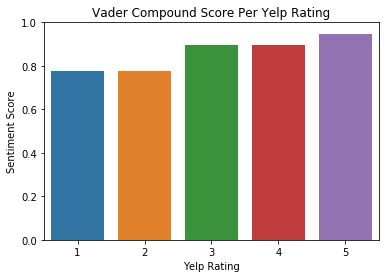

In [124]:
fig = plt.figure()
sns.barplot(x, y);
plt.ylim(0,1);
plt.xlabel('Yelp Rating');
plt.ylabel('Sentiment Score');
plt.title('Vader Compound Score Per Yelp Rating');

The sentiment of the top 30 words generated from each of the ratings is overwhelmingly positive from a VADER standpoint. You can also see that each rating share many words in common which just means all reviews share a common pattern when they are written out. 

We will need to develop a more robust model that takes into account the average sentiment that we have seen in the NLP EDA book which is much more representative of the negative views of the lower stars and the positive views of the 4 and 5 star ratings. For this, we will use neural networks